# Análisis de Fallas de Dispositivos Mercado Libre


## 1. Configuración del Entorno

Comenzamos importando las librerías necesarias para el análisis exploratorio y configurando las opciones de visualización.

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuraciones de visualización
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

## 2. Carga y Verificación Inicial de Datos

In [31]:
RUTA_DATOS = "../data/full_devices.csv"

try:
    df = pd.read_csv(RUTA_DATOS, encoding='latin-1')
    df['date'] = pd.to_datetime(df['date'])
    print(f"El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas.")
except FileNotFoundError:
    print(f"No se encontró el archivo en la ruta.")
    df = None


El dataset tiene 124494 filas y 12 columnas.


## 3. Análisis Estadístico Descriptivo

In [ ]:
if df is not None:
    print("\n[INFO] Información general del DataFrame:")
    df.info()

    print("\n\n[INFO] Resumen estadístico de las columnas numéricas:")
    print(df.describe().apply(lambda s: s.apply('{0:.2f}'.format)))

    print("\n\n[INFO] Conteo de valores nulos por columna:")
    print(df.isnull().sum())



[INFO] Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        124494 non-null  datetime64[ns]
 1   device      124494 non-null  object        
 2   failure     124494 non-null  int64         
 3   attribute1  124494 non-null  int64         
 4   attribute2  124494 non-null  int64         
 5   attribute3  124494 non-null  int64         
 6   attribute4  124494 non-null  int64         
 7   attribute5  124494 non-null  int64         
 8   attribute6  124494 non-null  int64         
 9   attribute7  124494 non-null  int64         
 10  attribute8  124494 non-null  int64         
 11  attribute9  124494 non-null  int64         
dtypes: datetime64[ns](1), int64(10), object(1)
memory usage: 11.4+ MB


[INFO] Resumen estadístico de las columnas numéricas:
            date    failure    at

## 4. Análisis del Desbalance de Clases

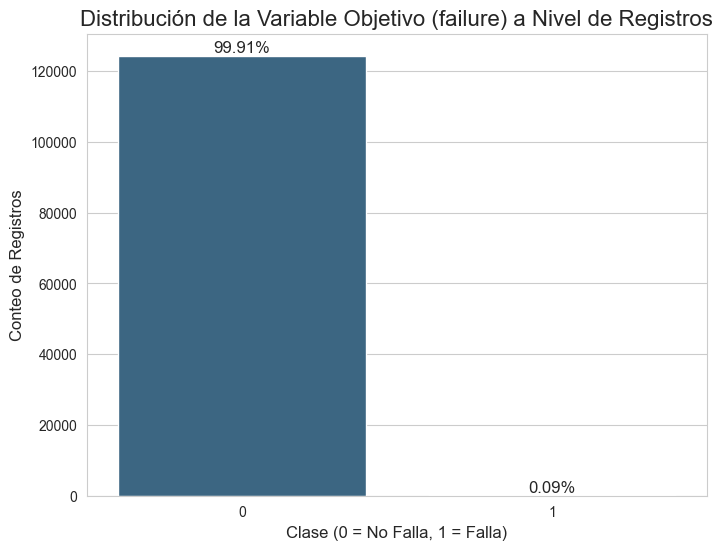


[INFO] Desbalance a Nivel de Registros:
failure
0    124388
1       106
Name: count, dtype: int64
-> 0.085% de los registros son fallas.

[INFO] Desbalance a Nivel de Dispositivos (la comparación justa):
Total de dispositivos únicos: 1169
Dispositivos únicos con al menos una falla: 106
-> 9.07% de los dispositivos fallan eventualmente.


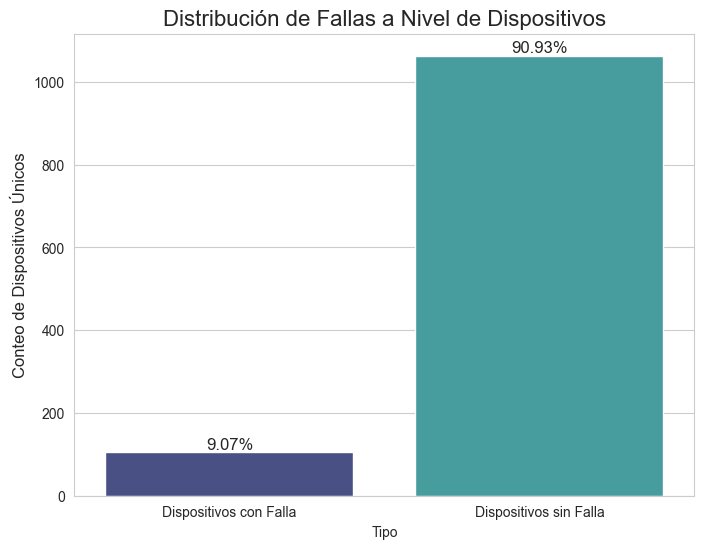

In [ ]:
if df is not None:
    # --- Análisis a Nivel de Registros (el que ya teníamos) ---
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x='failure', data=df, palette='viridis')
    plt.title('Distribución de la Variable Objetivo (failure) a Nivel de Registros', fontsize=16)
    plt.xlabel('Clase (0 = No Falla, 1 = Falla)', fontsize=12)
    plt.ylabel('Conteo de Registros', fontsize=12)
    
    total_registros = len(df)
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total_registros:.2f}%'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=12)
    
    plt.show()

    failure_counts = df['failure'].value_counts()
    print("\n[INFO] Desbalance a Nivel de Registros:")
    print(failure_counts)
    if 1 in failure_counts:
        print(f"-> {failure_counts[1] / total_registros * 100:.3f}% de los registros son fallas.")
    else:
        print("-> No se encontraron registros de falla.")

    # --- Análisis a Nivel de Dispositivos ---
    print("\n" + "="*50)
    print("[INFO] Desbalance a Nivel de Dispositivos (la comparación justa):")
    
    total_dispositivos = df['device'].nunique()
    disp_con_fallo = df[df['failure'] == 1]['device'].nunique()
    
    print(f"Total de dispositivos únicos: {total_dispositivos}")
    print(f"Dispositivos únicos con al menos una falla: {disp_con_fallo}")
    
    if total_dispositivos > 0:
        porcentaje_disp_fallan = (disp_con_fallo / total_dispositivos) * 100
        print(f"-> {porcentaje_disp_fallan:.2f}% de los dispositivos fallan eventualmente.")
    
    # Visualización para el análisis por dispositivo
    plt.figure(figsize=(8, 6))
    data_disp = {'Tipo': ['Dispositivos con Falla', 'Dispositivos sin Falla'], 
                 'Conteo': [disp_con_fallo, total_dispositivos - disp_con_fallo]}
    df_disp = pd.DataFrame(data_disp)
    
    ax_disp = sns.barplot(x='Tipo', y='Conteo', data=df_disp, palette='mako')
    plt.title('Distribución de Fallas a Nivel de Dispositivos', fontsize=16)
    plt.ylabel('Conteo de Dispositivos Únicos', fontsize=12)
    
    for p in ax_disp.patches:
        percentage = f'{100 * p.get_height() / total_dispositivos:.2f}%'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax_disp.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=12)
        
    plt.show()

## 5. Distribución de Atributos de Sensores

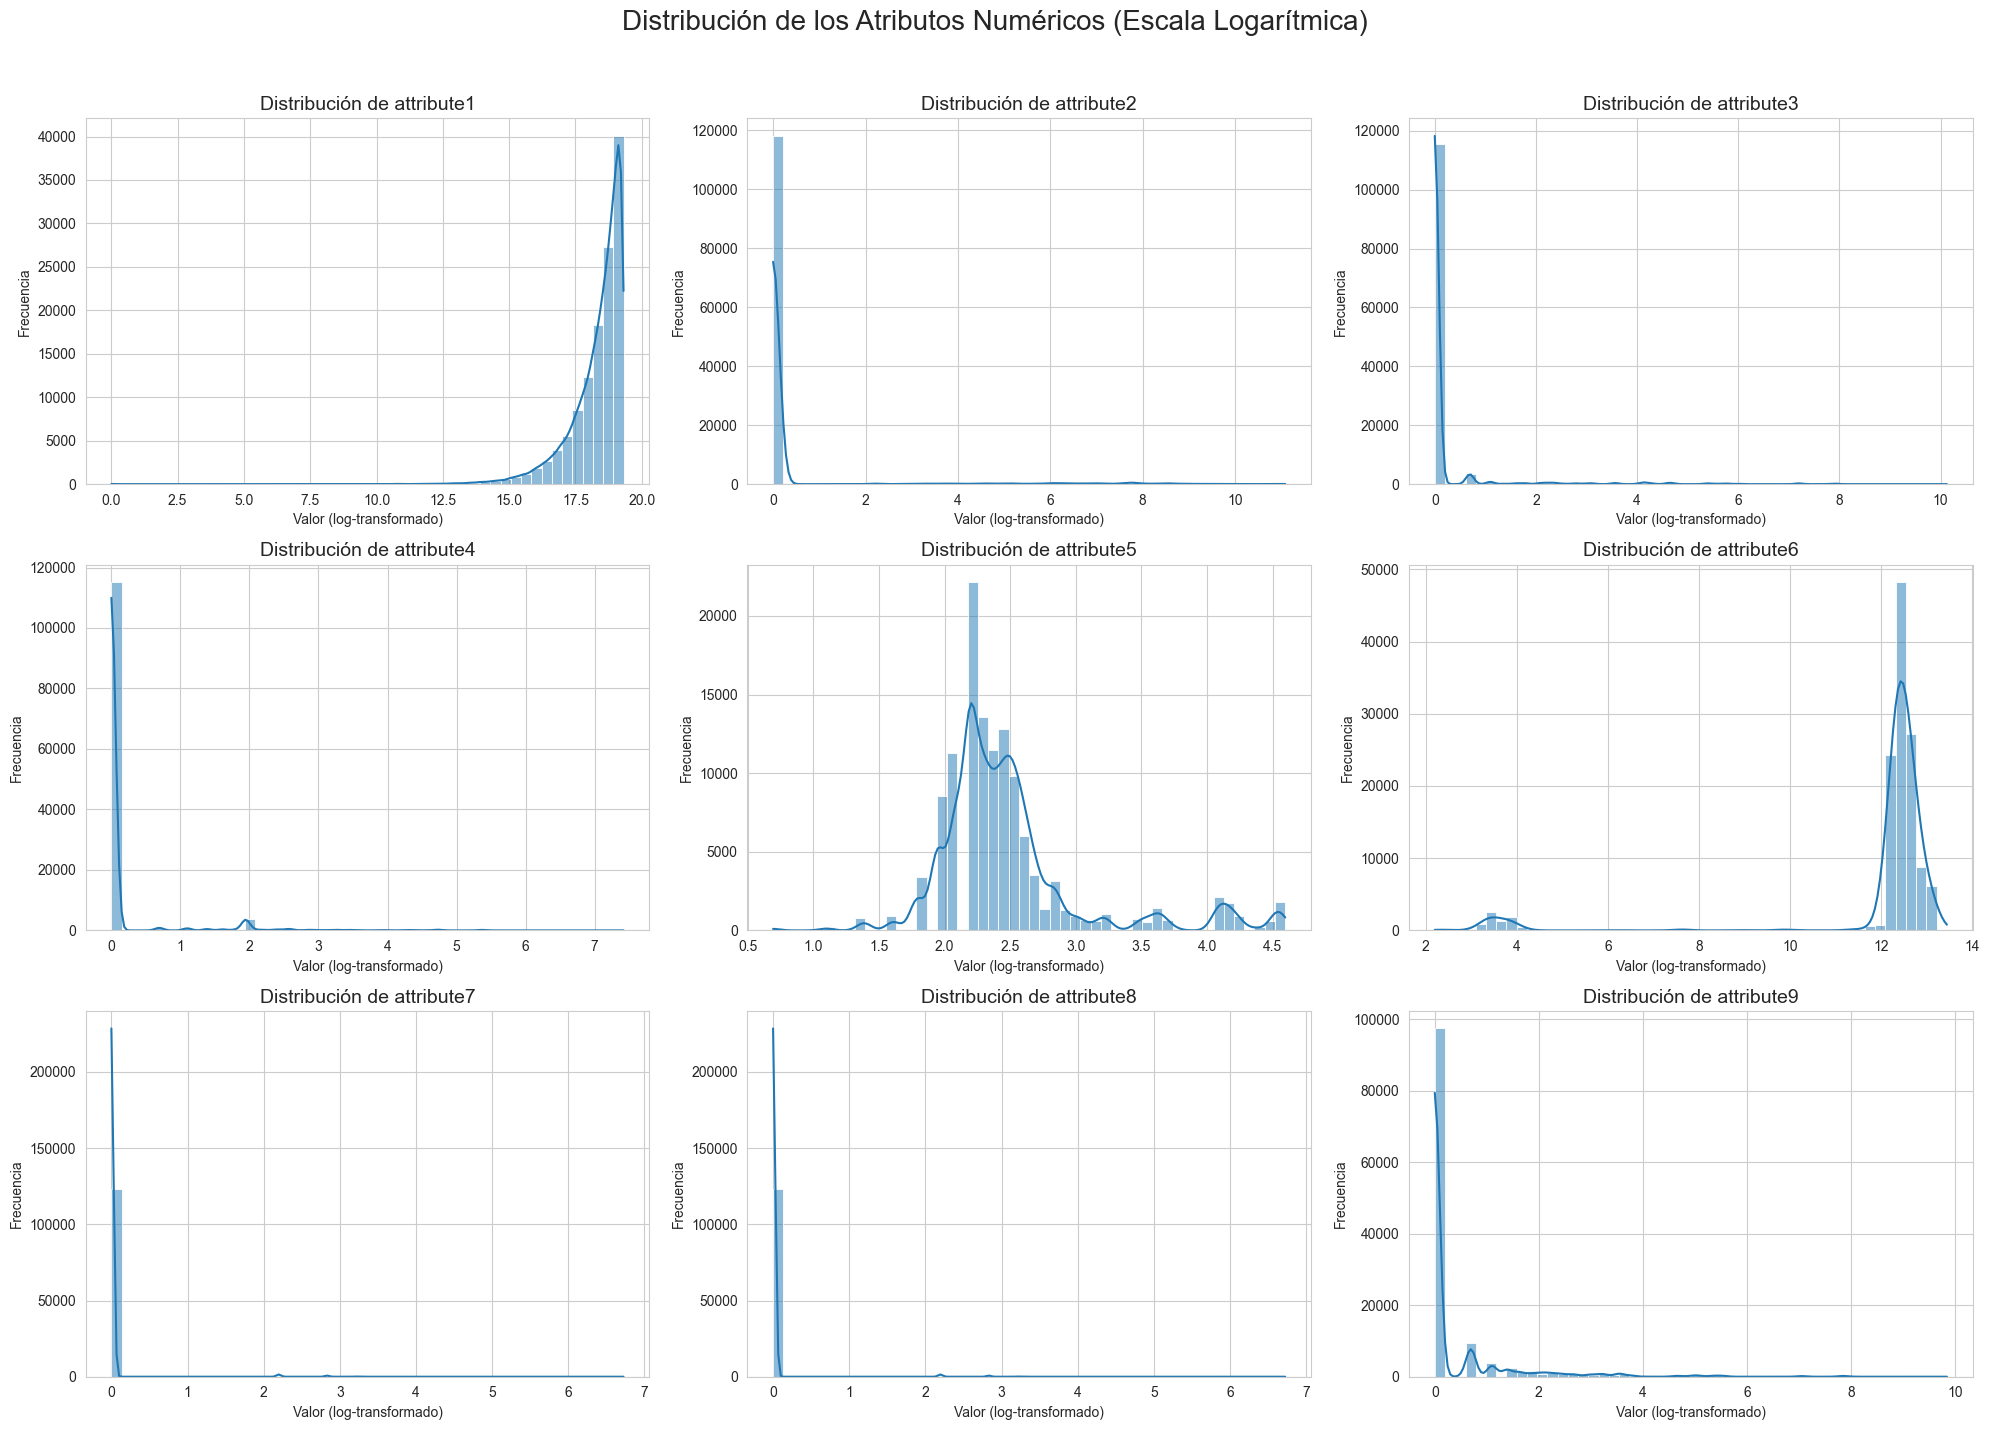

In [ ]:

if df is not None:
    atributos = [col for col in df.columns if col.startswith('attribute')]
    
    # Creamos una figura con subplots
    fig, axes = plt.subplots(3, 3, figsize=(20, 15))
    fig.suptitle('Distribución de los Atributos Numéricos (Escala Logarítmica)', fontsize=20)
    
    axes = axes.flatten()
    
    for i, col in enumerate(atributos):
        # cuando hay muchos ceros o valores bajos.
        #  evitar log(0)
        sns.histplot(np.log1p(df[col]), ax=axes[i], kde=True, bins=50)
        axes[i].set_title(f'Distribución de {col}', fontsize=14)
        axes[i].set_xlabel('Valor (log-transformado)')
        axes[i].set_ylabel('Frecuencia')

    plt.tight_layout(rect=[0, 0.03, 1, 0.96])
    plt.show()


## 6. Análisis de Correlaciones

Identificamos relaciones lineales entre atributos y con la variable objetivo. Las correlaciones altas pueden indicar redundancia entre sensores o relaciones importantes con las fallas. De la siguiente gráfica es notable que existe correlación de 1, ra el atributo 8 y 7, lo que sugiere que alguno de los dos puede omitirse para el análisis al representar exactamente lo mismo (redundancia)

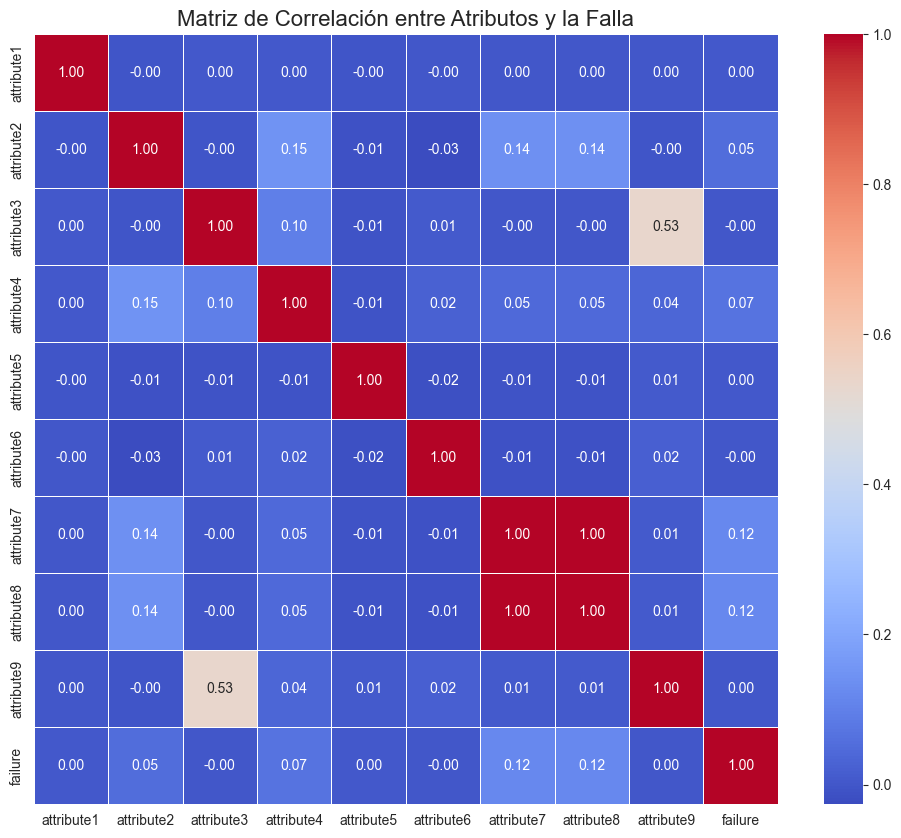

In [ ]:
if df is not None:
    plt.figure(figsize=(12, 10))
    
    # Calcular la correlación solo de las columnas de interés
    correlation_matrix = df[atributos + ['failure']].corr()
    
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=.5)
    plt.title('Matriz de Correlación entre Atributos y la Falla', fontsize=16)
    plt.show()

## 7. Análisis Temporal de Fallas

La idea es analizar la evolución temporal de las fallas para identificar:
- Patrones estacionales o temporales
- Comportamiento de sensores antes de fallas
- Diferencias entre dispositivos que fallan vs. los que no

Este análisis nos ayuda a entender si existen señales precursoras detectables. Sin embargo, como se aprecia a continuación, es complicado poder identificar algún patrón visual que pueda indicar o explicar el fallo que un dispositivo eventualmente va a tener

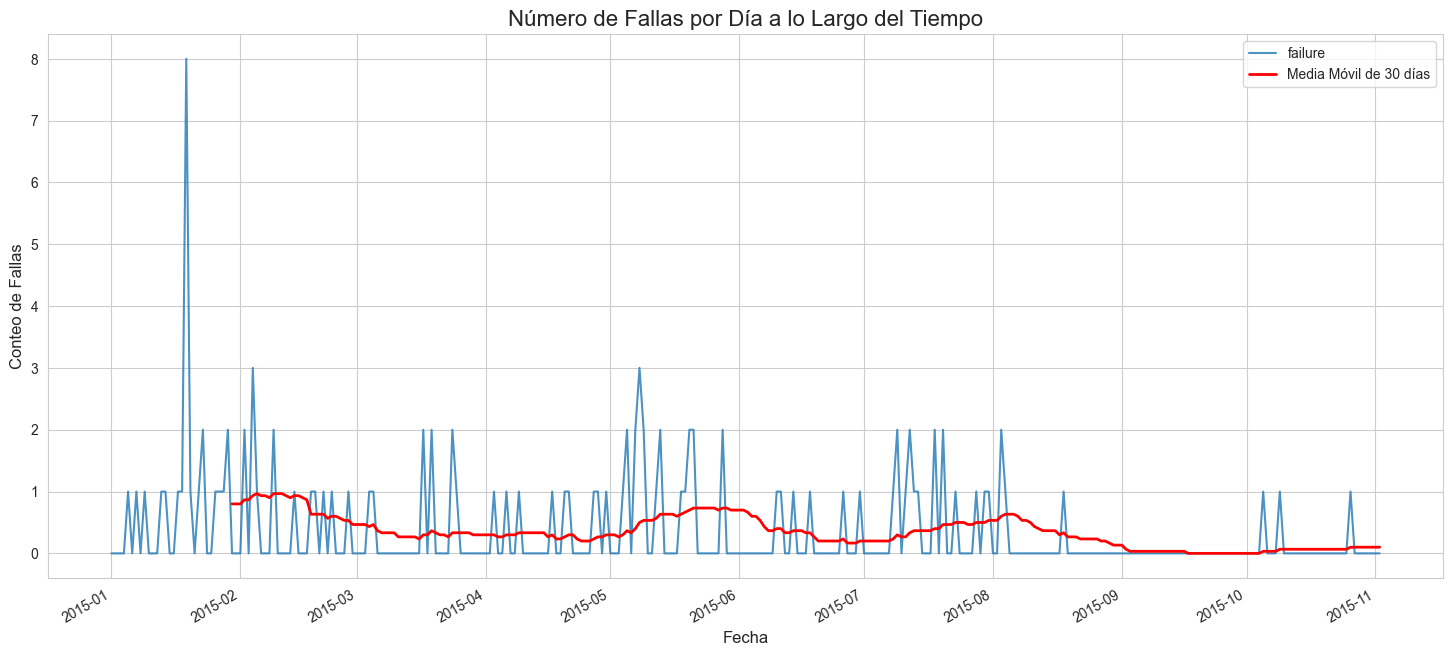


[INFO] Visualizando la evolución para una muestra de dispositivos...
 - Dispositivos con falla: ['S1F0S2WJ', 'Z1F1VQFY']
 - Dispositivos sin falla: ['S1F136KJ', 'S1F13699']


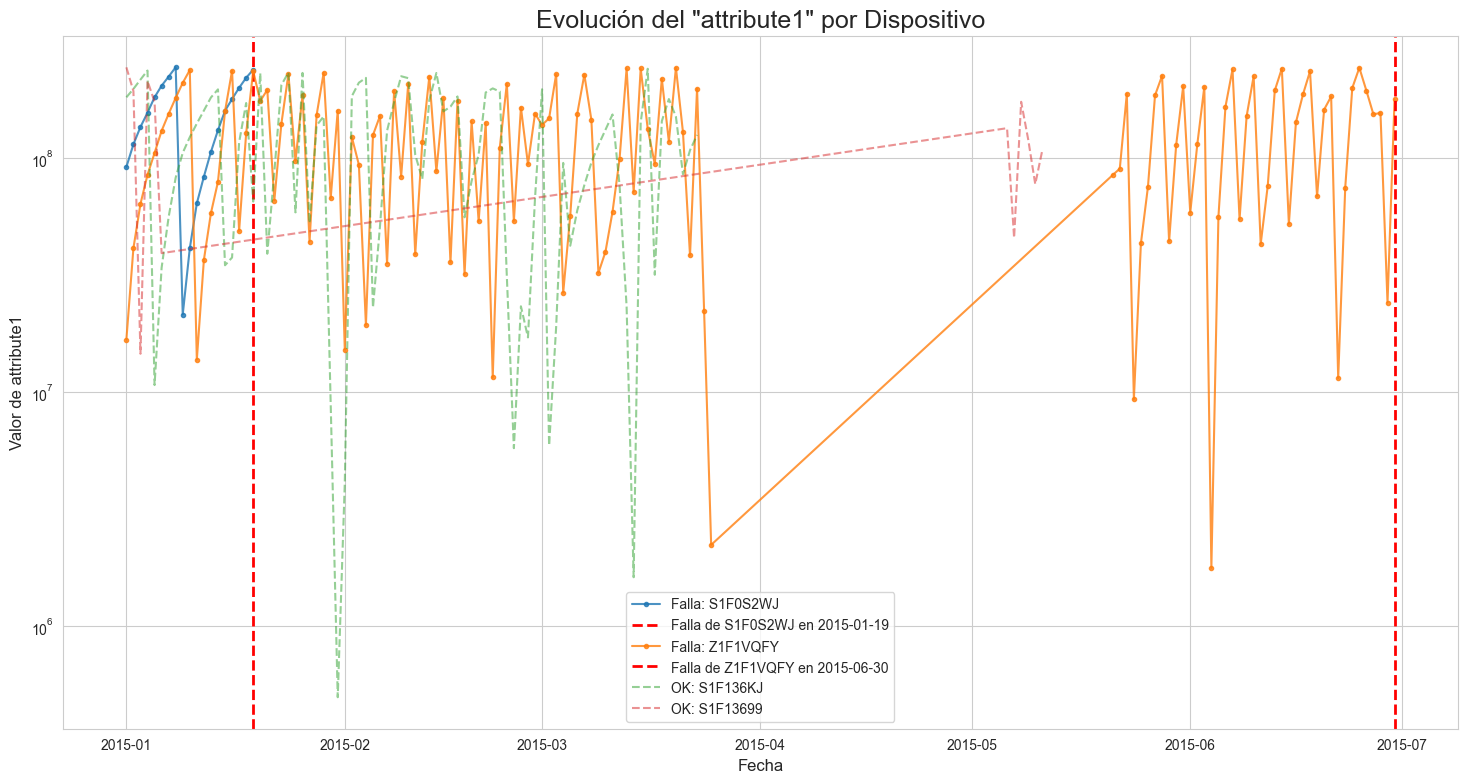

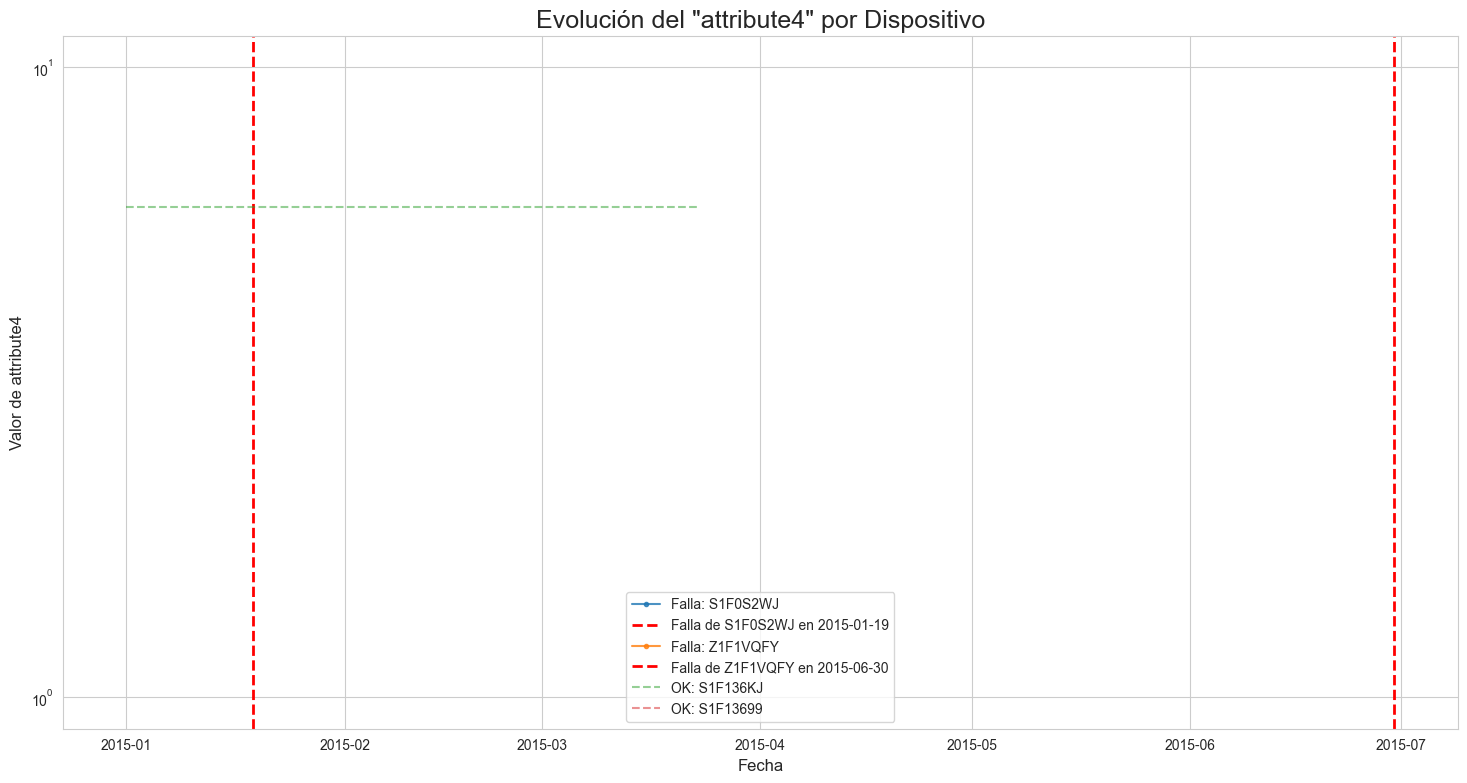

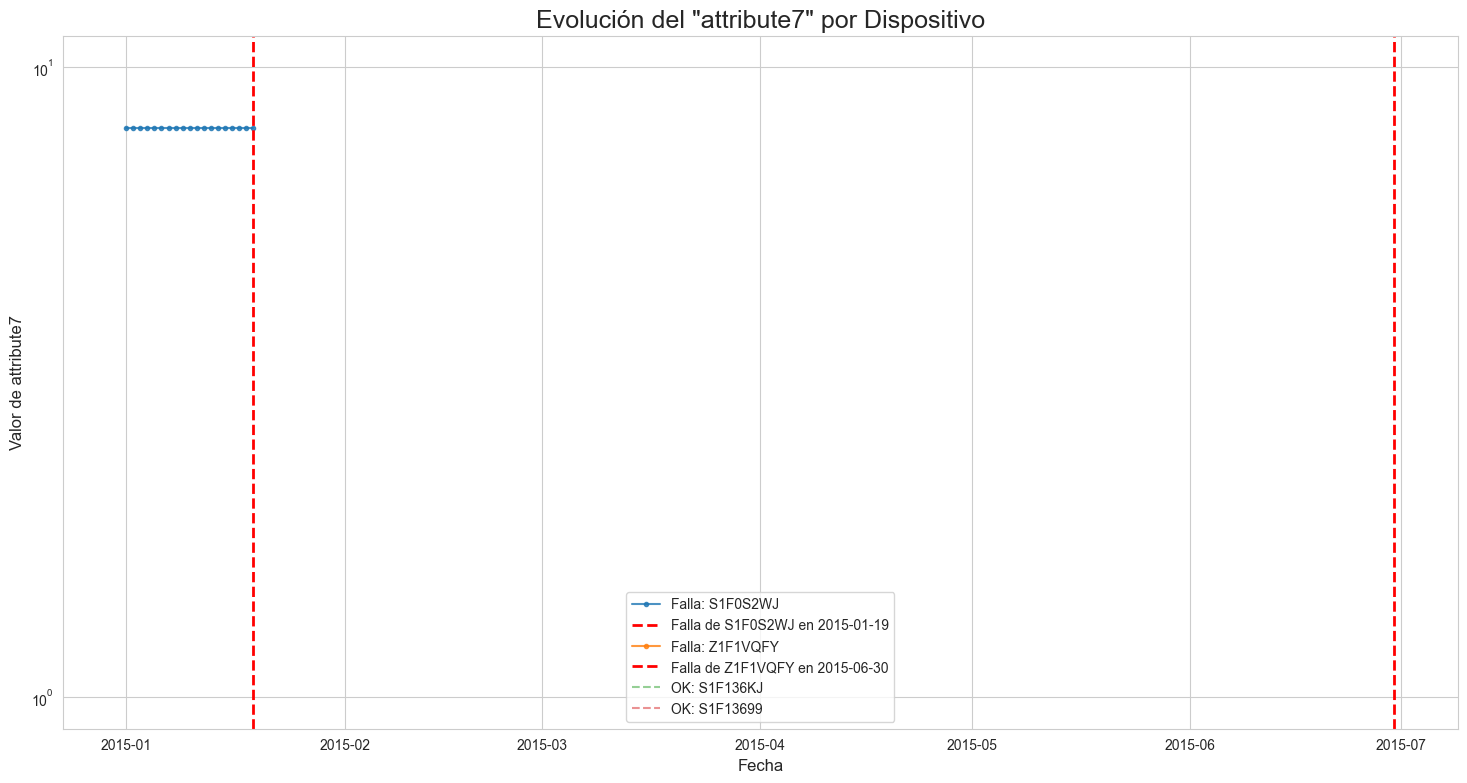

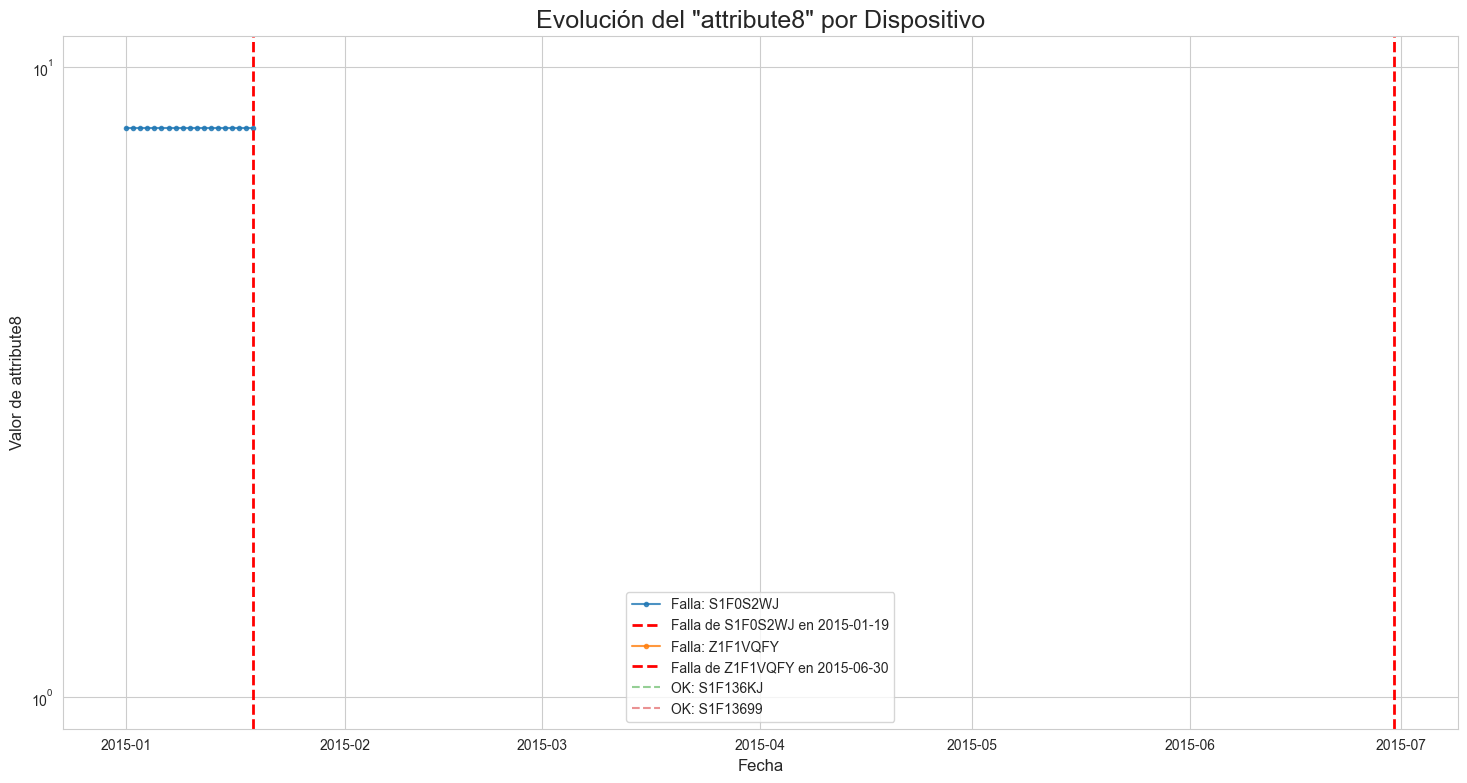

In [ ]:
if df is not None:
    fallas_por_dia = df.groupby('date')['failure'].sum()
    
    plt.figure(figsize=(18, 8))
    fallas_por_dia.plot(kind='line', alpha=0.8)
    

    # Media móvil para suavizar la serie temporal
    fallas_por_dia.rolling(window=30).mean().plot(kind='line', color='red', linewidth=2, label='Media Móvil de 30 días')
    
    plt.title('Número de Fallas por Día a lo Largo del Tiempo', fontsize=16)
    plt.xlabel('Fecha', fontsize=12)
    plt.ylabel('Conteo de Fallas', fontsize=12)
    plt.legend()
    plt.show()
    
if df is not None:
    # Identificar dispositivos que fallan vs. los que no
    dispositivos_con_fallo = df[df['failure'] == 1]['device'].unique()
    dispositivos_sin_fallo_registrado = np.setdiff1d(df['device'].unique(), dispositivos_con_fallo)
    
    rng = np.random.default_rng(42)
    if len(dispositivos_con_fallo) >= 2 and len(dispositivos_sin_fallo_registrado) >= 2:
        dispositivos_muestra_fallo = rng.choice(dispositivos_con_fallo, 2, replace=False)
        dispositivos_muestra_ok = rng.choice(dispositivos_sin_fallo_registrado, 2, replace=False)
        
        # Atributos que mostraron algo de correlación o que suelen ser importantes
        atributos_a_visualizar = ['attribute1', 'attribute4', 'attribute7', 'attribute8']

        print(f"\n[INFO] Visualizando la evolución para una muestra de dispositivos...")
        print(f" - Dispositivos con falla: {list(dispositivos_muestra_fallo)}")
        print(f" - Dispositivos sin falla: {list(dispositivos_muestra_ok)}")

        for attribute in atributos_a_visualizar:
            plt.figure(figsize=(18, 9))
            
            # --- Graficar dispositivos que SÍ fallaron ---
            for device_id in dispositivos_muestra_fallo:
                subset = df[df['device'] == device_id].sort_values('date')
                fecha_fallo = subset[subset['failure'] == 1]['date'].min()
                
                # Evolución del atributo
                plt.plot(subset['date'], subset[attribute], label=f'Falla: {device_id}', alpha=0.8, marker='o', markersize=3, linestyle='-')
                
                # Punto exacto de la falla
                plt.axvline(x=fecha_fallo, color='red', linestyle='--', linewidth=2, label=f'Falla de {device_id} en {fecha_fallo.date()}')

            # --- Graficar dispositivos que NO fallaron (como control) ---
            for device_id in dispositivos_muestra_ok:
                subset = df[df['device'] == device_id].sort_values('date')
                plt.plot(subset['date'], subset[attribute], label=f'OK: {device_id}', linestyle='--', alpha=0.5)

            plt.title(f'Evolución del "{attribute}" por Dispositivo', fontsize=18)
            plt.xlabel('Fecha', fontsize=12)
            plt.ylabel(f'Valor de {attribute}', fontsize=12)
            plt.legend()
            plt.yscale('log')
            plt.show()

    else:
        pass

## 8. Detección de Valores Atípicos

Es importante identificar si existen outliers, dado que en problemas desbalanceados como es el caso, puede introducir ruido y sesgo al algoritmo que se busca entrenar. Como es notable en gráficos siguientes, efectivamente existen outliers para los diferentes atributos, por lo que es necesario darles un tratamiento adecuado.

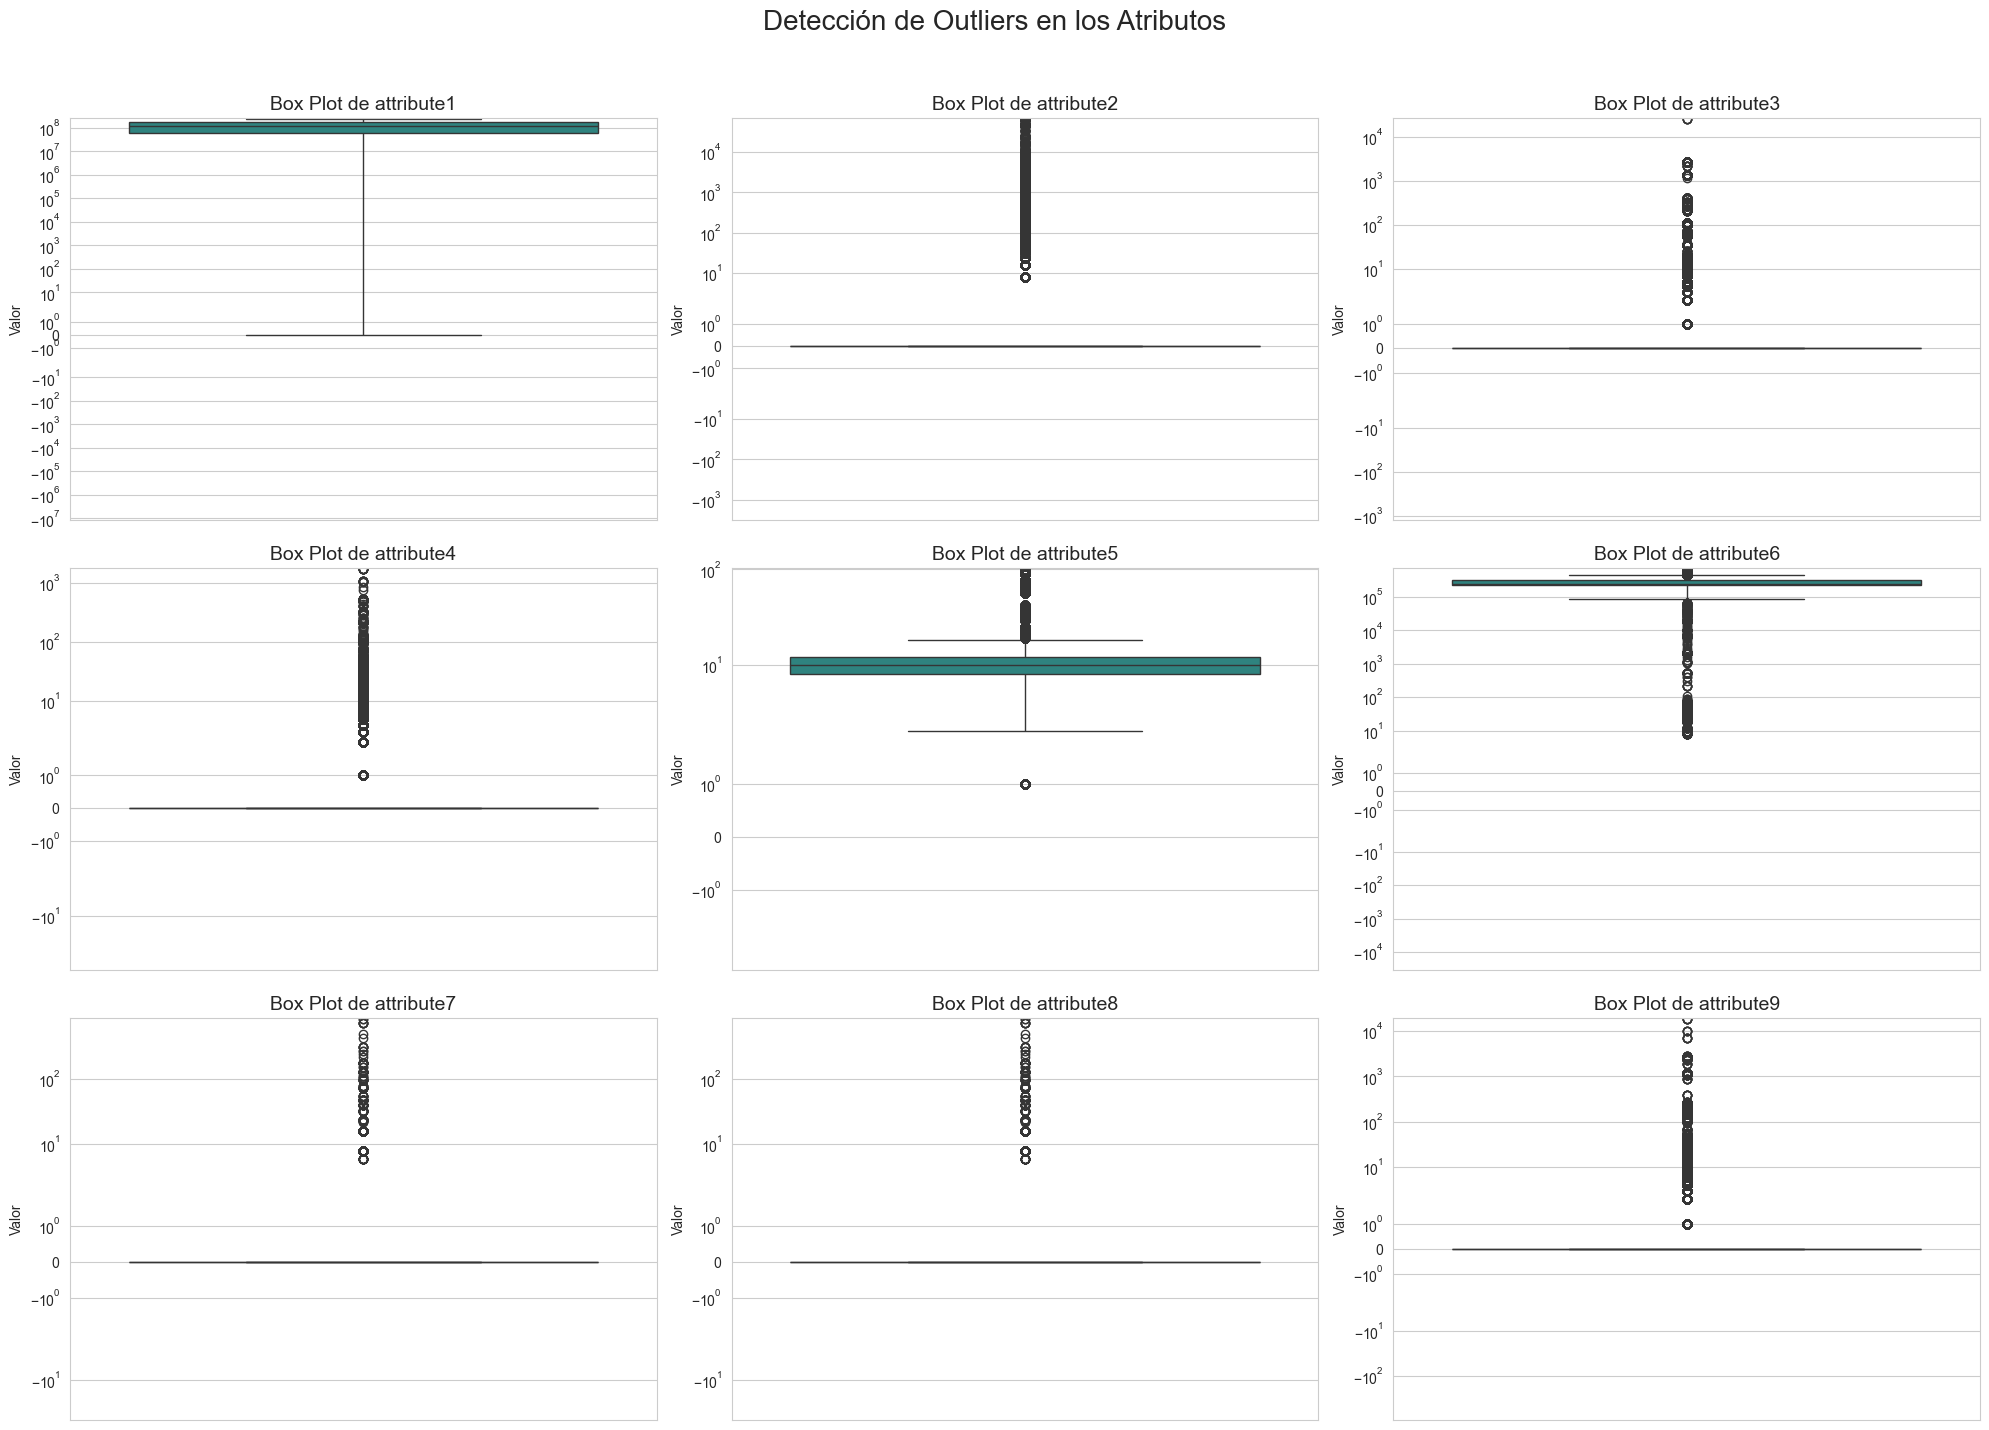

In [37]:
if df is not None:
    atributos = [col for col in df.columns if col.startswith('attribute')]
    
    fig, axes = plt.subplots(3, 3, figsize=(20, 15))
    fig.suptitle('Detección de Outliers en los Atributos', fontsize=20)
    axes = axes.flatten()
    
    for i, col in enumerate(atributos):
        sns.boxplot(y=df[col], ax=axes[i], palette='viridis')
        axes[i].set_title(f'Box Plot de {col}', fontsize=14)
        axes[i].set_ylabel('Valor')
        axes[i].set_yscale('symlog')
        
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)
        
    plt.tight_layout(rect=[0, 0.03, 1, 0.96])
    plt.show()

---

# PARTE II: MODELO PREDICTIVO
 

In [38]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import optuna
from typing import List, Tuple
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import (
    average_precision_score, roc_auc_score, precision_recall_curve,
    confusion_matrix, brier_score_loss, log_loss
)
import warnings

warnings.filterwarnings("ignore")
print("Librerías importadas y advertencias desactivadas.")



Librerías importadas y advertencias desactivadas.


## 10. Definición de Parámetros del Problema

**ALINEACIÓN CON NEGOCIO**: Definimos parámetros clave que determinan cómo el modelo se alinea con las necesidades operativas:

- **Horizonte de 7 días**: Tiempo suficiente para planificar mantenimiento (hallado de forma empírica)
- **División por dispositivos**
- **Ratios de evaluación**: Balancear y tomar una muestra adecuada para evaluación

In [39]:
RUTA_DATOS = "../data/full_devices.csv"
COLUMNA_FECHA, COLUMNA_DISPOSITIVO, COLUMNA_OBJETIVO = "date", "device", "failure"

# Parámetros para la definición del problema y el modelo
HORIZONTE_PREDICCION_DIAS = 7  # ¿Cuántos días hacia adelante se quiere predecir?
HISTORIAL_MINIMO_DIAS = 7      # Días mínimos de datos para que un dispositivo sea considerado

# Parámetros para la división de datos y la evaluación
FRACCION_FALLOS_VALIDACION = 0.25 # Porcentaje de dispositivos con fallo que irán al conjunto de validación
RATIO_OK_FALLO_VALIDACION = 1.0  # Por cada dispositivo con fallo en validación, cuántos sin fallo incluir
RATIO_NEGATIVOS_VENTANA = 3      # Por cada ventana de fallo, cuántas ventanas de "no fallo" generar para evaluación
ESTADO_ALEATORIO = 42            # Semilla para la reproducibilidad

## 11. Funciones de Preprocesamiento y Feature Engineering

Las siguientes funciones permiten:
- **Limpian datos**: Manejan outliers y valores faltantes.
- **Crean etiquetas temporales**
- **Generan features**: Crean características que capturan patrones temporales
- **Dividen datos**: Aseguran que dispositivos no se mezclen entre train/test

In [40]:

def load_and_clean_data(ruta_archivo: str) -> pd.DataFrame:
    """Carga, limpia y realiza un preprocesamiento básico de los datos."""
    df = pd.read_csv(ruta_archivo, encoding="latin-1")


    df = df.drop(columns=['attribute8'])
    print("\n[INFO] Columna 'attribute8' eliminada por ser redundante con 'attribute7'.")
    print(f"El dataset ahora tiene {df.shape[1]} columnas.")
        
        
    df = ensure_datetime_column(df, COLUMNA_FECHA)
    df = df.sort_values([COLUMNA_DISPOSITIVO, COLUMNA_FECHA]).drop_duplicates([COLUMNA_DISPOSITIVO, COLUMNA_FECHA])
    df["fallo_acumulado"] = df.groupby(COLUMNA_DISPOSITIVO)[COLUMNA_OBJETIVO].cumsum()
    df = df[df["fallo_acumulado"] <= 1].copy()
    
    atributos = [c for c in df.columns if c.startswith("attribute")]
    for col in atributos:
        df[col] = df[col].replace([np.inf, -np.inf], np.nan)
        df[col] = df.groupby(COLUMNA_DISPOSITIVO)[col].transform(lambda x: x.fillna(x.median()))
        df[col] = df[col].fillna(df[col].median())
        df[col] = clip_values_by_iqr(df[col], 3.0)
    
    fecha_primer_registro = df.groupby(COLUMNA_DISPOSITIVO)[COLUMNA_FECHA].transform("min")
    df["edad_dispositivo_dias"] = (df[COLUMNA_FECHA] - fecha_primer_registro).dt.days.clip(lower=0)
    return df

def label_failure_horizon(df: pd.DataFrame, horizonte_dias: int) -> pd.DataFrame:
    """Crea la variable objetivo 'y' (1 si el dispositivo falla dentro del horizonte, 0 si no)."""
    fecha_de_fallo = df[df[COLUMNA_OBJETIVO] == 1].groupby(COLUMNA_DISPOSITIVO)[COLUMNA_FECHA].min().rename("fecha_fallo")
    df = df.merge(fecha_de_fallo, on=COLUMNA_DISPOSITIVO, how="left")
    df = df.loc[~((df["fecha_fallo"].notna()) & (df[COLUMNA_FECHA] == df["fecha_fallo"]))].copy()
    df["dias_para_fallo"] = np.where(df["fecha_fallo"].notna(), (df["fecha_fallo"] - df[COLUMNA_FECHA]).dt.days, np.inf)
    df["y"] = (df["dias_para_fallo"] <= horizonte_dias).astype(int)
    df = df[(df["dias_para_fallo"] > 0) | (df["dias_para_fallo"] == np.inf)].copy()
    return df

def create_temporal_features(df: pd.DataFrame, ventanas: List[int] = [3, 7, 14, 30]) -> Tuple[pd.DataFrame, List[str]]:
    """Crea características basadas en ventanas móviles"""
    print("   -> Creando features de ventanas móviles (medias, std)")
    atributos = [c for c in df.columns if c.startswith("attribute")]
    df_features = df[[COLUMNA_DISPOSITIVO, COLUMNA_FECHA]].copy()
    df_features.index = df.index
    grupo_dispositivo = df.groupby(COLUMNA_DISPOSITIVO)
    epsilon = 1e-8

    for ventana in ventanas:
        for col in atributos:
            serie_pasada = grupo_dispositivo[col].shift(1)
            rolling_group = serie_pasada.groupby(df[COLUMNA_DISPOSITIVO]).rolling(ventana, min_periods=1)
            df_features[f"{col}_media_{ventana}d"] = rolling_group.mean().reset_index(level=0, drop=True)
            df_features[f"{col}_std_{ventana}d"] = rolling_group.std().reset_index(level=0, drop=True).fillna(0.0)

    print("   -> Creando features avanzadas (ratios y pendientes)...")
    for i, j in [(1, 2), (4, 5)]:
        attr_a, attr_b = f"attribute{i}", f"attribute{j}"
        df_features[f"{attr_a}_div_{attr_b}"] = df[attr_a] / (df[attr_b] + epsilon)

    for col in atributos:
        serie_pasada = grupo_dispositivo[col].shift(1)
        media_corta = serie_pasada.groupby(df[COLUMNA_DISPOSITIVO]).rolling(7, min_periods=1).mean().reset_index(level=0, drop=True)
        media_larga = serie_pasada.groupby(df[COLUMNA_DISPOSITIVO]).rolling(30, min_periods=1).mean().reset_index(level=0, drop=True)
        df_features[f"{col}_ratio_7_30"] = (media_corta / (media_larga + epsilon)).fillna(1.0).clip(0, 5)

    def calculate_slope(serie):
        if len(serie) < 2: return 0.0
        return np.polyfit(np.arange(len(serie)), serie, 1)[0]

    for col in atributos:
        serie_pasada = grupo_dispositivo[col].shift(1)
        df_features[f"{col}_pendiente_7d"] = serie_pasada.groupby(df[COLUMNA_DISPOSITIVO]).rolling(7).apply(calculate_slope, raw=True).reset_index(level=0, drop=True).fillna(0.0)

    df_features["edad_dispositivo_dias"] = df["edad_dispositivo_dias"]
    nombres_features = [c for c in df_features.columns if c not in [COLUMNA_DISPOSITIVO, COLUMNA_FECHA]]
    print(f"   -> Total features creadas: {len(nombres_features)}")
    
    df_features = df_features[nombres_features].replace([np.inf, -np.inf], np.nan).fillna(0.0)
    return df_features, nombres_features

def split_by_device(df: pd.DataFrame, fraccion_val: float, ratio_ok_fallo: float, col_disp: str, col_y: str):
    """Divide los datos en entrenamiento y validación asegurando que los dispositivos no se mezclen."""
    rng = np.random.default_rng(ESTADO_ALEATORIO)
    dispositivos_con_fallo = df.loc[df[col_y] == 1, col_disp].unique()
    dispositivos_sin_fallo = np.setdiff1d(df[col_disp].unique(), dispositivos_con_fallo)
    
    n_fallo_val = max(1, int(np.ceil(len(dispositivos_con_fallo) * fraccion_val)))
    disp_val_fallo = set(rng.choice(dispositivos_con_fallo, size=n_fallo_val, replace=False))
    
    n_ok_val = min(len(dispositivos_sin_fallo), int(np.ceil(n_fallo_val * ratio_ok_fallo)))
    disp_val_ok = set(rng.choice(dispositivos_sin_fallo, size=n_ok_val, replace=False)) if n_ok_val > 0 else set()
    
    dispositivos_validacion = disp_val_fallo.union(disp_val_ok)
    mascara_validacion = df[col_disp].isin(dispositivos_validacion)
    mascara_entrenamiento = ~mascara_validacion
    
    if df.loc[mascara_validacion, col_y].sum() == 0 and len(dispositivos_con_fallo) > 0:
        disp_extra = rng.choice(dispositivos_con_fallo, size=1)[0]
        mascara_validacion |= (df[col_disp] == disp_extra)
        mascara_entrenamiento = ~mascara_validacion
        
    return mascara_entrenamiento, mascara_validacion, len(disp_val_fallo), len(disp_val_ok)

## 12. Funciones de Evaluación Enfocada en el problema

- **Ventanas de evento**: Períodos de 7 días antes de fallas, pues el objetivo es anticipar la falla
- **Métricas de negocio**: Precision@K para priorización operativa
- **Evaluación balanceada**

In [41]:
def ensure_datetime_column(dataframe, nombre_columna):
    """Asegura que una columna sea de tipo datetime."""
    if not np.issubdtype(dataframe[nombre_columna].dtype, np.datetime64):
        dataframe[nombre_columna] = pd.to_datetime(dataframe[nombre_columna])
    return dataframe

def clip_values_by_iqr(serie, factor_k=3.0):
    """Limita los valores atípicos de una serie usando el rango intercuartílico (IQR)."""
    q1, q3 = serie.quantile(0.25), serie.quantile(0.75)
    iqr = q3 - q1
    limite_inferior = q1 - factor_k * iqr
    limite_superior = q3 + factor_k * iqr
    return serie.clip(limite_inferior, limite_superior)

def generate_calibration_table(y_real, y_prob, n_bins=10):
    """Crea una tabla para evaluar la calibración de las probabilidades del modelo."""
    df_calibracion = pd.DataFrame({"y_real": y_real, "probabilidad": y_prob})
    df_calibracion["rango_prob"] = df_calibracion["probabilidad"].rank(method="first")
    df_calibracion["bin"] = pd.qcut(df_calibracion["rango_prob"], q=n_bins, labels=False, duplicates="drop")

    tabla_agrupada = df_calibracion.groupby("bin", dropna=True).agg(
        n_muestras=("y_real", "size"),
        prob_media=("probabilidad", "mean"),
        tasa_real_fallos=("y_real", "mean")
    ).reset_index(drop=True)

    tasa_global_fallos = df_calibracion["y_real"].mean()
    tabla_agrupada["lift"] = tabla_agrupada["tasa_real_fallos"] / (tasa_global_fallos + 1e-12)
    return tabla_agrupada

def calculate_ece(y_real, y_prob, n_bins=10):
    """Calcula el Error de Calibración Esperado (Expected Calibration Error)."""
    df_ece = pd.DataFrame({"y_real": y_real, "probabilidad": y_prob})
    df_ece["rango_prob"] = df_ece["probabilidad"].rank(method="first")
    df_ece["bin"] = pd.qcut(df_ece["rango_prob"], q=n_bins, labels=False, duplicates="drop")
    
    grupos = df_ece.groupby("bin", dropna=True).agg(
        confianza_media=("probabilidad", "mean"),
        precision_media=("y_real", "mean"),
        n_muestras=("y_real", "size")
    )
    
    N = len(df_ece)
    ece = (grupos["n_muestras"] / N * (grupos["precision_media"] - grupos["confianza_media"]).abs()).sum()
    return float(ece)


def print_confusion_matrix_and_metrics(y_real, y_pred, titulo=""):
    """Imprime una matriz de confusión formateada y las métricas asociadas."""
    tn, fp, fn, tp = confusion_matrix(y_real, y_pred).ravel()
    precision = tp / (tp + fp + 1e-12)
    recall = tp / (tp + fn + 1e-12)
    especificidad = tn / (tn + fp + 1e-12)
    f1 = 2 * precision * recall / (precision + recall + 1e-12)
    balanced_accuracy = 0.5 * (recall + especificidad)
    
    print(f"{titulo} Matriz de confusión:\n   [[Verdaderos Negativos (TN)={tn}  Falsos Positivos (FP)={fp}]\n    [Falsos Negativos (FN)={fn}  Verdaderos Positivos (TP)={tp}]]")
    print(f"   Precisión={precision:.3f}  Recall={recall:.3f}  Especificidad={especificidad:.3f}  F1-Score={f1:.3f}  Accuracy Balanceado={balanced_accuracy:.3f}")

def evaluate_predictions(y_real, probabilidades, etiqueta_evaluacion, es_evaluacion_por_ventana=False):
    """Calcula e imprime un conjunto unificado de métricas de clasificación."""
    pr_auc = average_precision_score(y_real, probabilidades)
    roc_auc = roc_auc_score(y_real, probabilidades)
    brier = brier_score_loss(y_real, probabilidades)
    ece = calculate_ece(y_real, probabilidades, n_bins=10)
    logloss = log_loss(y_real, np.clip(probabilidades, 1e-6, 1 - 1e-6), labels=[0, 1])
    
    print(f"\n[{etiqueta_evaluacion}] N={len(y_real)} | PR-AUC={pr_auc:.4f}  ROC-AUC={roc_auc:.4f}  Brier={brier:.5f}  LogLoss={logloss:.5f}  ECE={ece:.5f}")
    
    precisiones, recalls, umbrales = precision_recall_curve(y_real, probabilidades)
    f1_scores = (2 * precisiones * recalls) / (precisiones + recalls + 1e-12)
    
    umbral_optimo = umbrales[np.argmax(f1_scores[:-1])] if len(umbrales) > 0 else 0.5
    predicciones_optimas = (probabilidades >= umbral_optimo).astype(int)
    
    print(f"   [Umbral F1 Óptimo] Umbral={umbral_optimo:.4f}")
    print_confusion_matrix_and_metrics(y_real, predicciones_optimas, "   [F1 Óptimo]")
    
    if es_evaluacion_por_ventana:
        orden = np.argsort(-probabilidades)
        y_real_ordenado = y_real[orden]
        for K in [5, 10, 20]:
            if K <= len(y_real_ordenado):
                precision_at_k = y_real_ordenado[:K].mean()
                print(f"   Precisión@{K}={precision_at_k:.3f} (de {len(y_real_ordenado)} ventanas totales)")

    print("\n   Tabla de Calibración por Decil de Riesgo:")
    tabla_cal = generate_calibration_table(y_real, probabilidades, n_bins=10)
    print(tabla_cal.to_string(index=False, float_format=lambda x: f"{x:.4f}"))

def build_evaluation_windows(df_val, probabilidades_val, horizonte, **kwargs):
    """Construye 'ventanas de evento' para una evaluación más realista."""
    df_val_con_prob = df_val.copy()
    df_val_con_prob["probabilidad"] = probabilidades_val
    rng = np.random.default_rng(kwargs.get("random_state", ESTADO_ALEATORIO))
    
    ventanas_positivas = []
    dispositivos_que_fallan = df_val_con_prob.loc[df_val_con_prob[kwargs.get("col_y", "y")] == 1, [COLUMNA_DISPOSITIVO, "fecha_fallo"]].drop_duplicates()
    
    for _, fila in dispositivos_que_fallan.iterrows():
        disp, fecha_fallo = fila[COLUMNA_DISPOSITIVO], fila["fecha_fallo"]
        ventana = df_val_con_prob[(df_val_con_prob[COLUMNA_DISPOSITIVO] == disp) & (df_val_con_prob[COLUMNA_FECHA] < fecha_fallo) & (df_val_con_prob[COLUMNA_FECHA] >= fecha_fallo - pd.Timedelta(days=horizonte))]
        if not ventana.empty:
            ventanas_positivas.append({"dispositivo": disp, "label": 1, "score": float(ventana["probabilidad"].max())})
    
    df_ventanas_pos = pd.DataFrame(ventanas_positivas)

    ventanas_negativas = []
    dispositivos_ok = df_val_con_prob.loc[df_val_con_prob["fecha_fallo"].isna(), COLUMNA_DISPOSITIVO].unique()
    necesarias = len(df_ventanas_pos) * kwargs.get("ratio_negativos", 3)
    
    if len(dispositivos_ok) > 0 and not df_ventanas_pos.empty:
        intentos = 0
        while len(ventanas_negativas) < necesarias and intentos < necesarias * 20:
            disp_aleatorio = rng.choice(dispositivos_ok)
            datos_disp = df_val_con_prob[df_val_con_prob[COLUMNA_DISPOSITIVO] == disp_aleatorio]
            if len(datos_disp) >= horizonte:
                fecha_fin_ventana = datos_disp[COLUMNA_FECHA].iloc[horizonte - 1:].sample(1, random_state=int(rng.integers(1e9))).iloc[0]
                ventana = datos_disp[(datos_disp[COLUMNA_FECHA] <= fecha_fin_ventana) & (datos_disp[COLUMNA_FECHA] >= fecha_fin_ventana - pd.Timedelta(days=horizonte - 1))]
                if len(ventana) >= horizonte // 2:
                    ventanas_negativas.append({"dispositivo": disp_aleatorio, "label": 0, "score": float(ventana["probabilidad"].max())})
            intentos += 1
            
    return df_ventanas_pos, pd.DataFrame(ventanas_negativas)
    
print("Funciones de utilidad y métricas definidas.")

Funciones de utilidad y métricas definidas.


## 13. Pipeline Principal con Optimización Optuna

**PROCESO COMPLETO**: Esta función ejecuta todo el pipeline:

1. **Carga y limpieza** de datos
2. **Feature engineering** temporal sin data leakage  
3. **División estratégica** por dispositivos
4. **Optimización con Optuna** usando evaluación por ventanas
5. **Entrenamiento final** con mejores hiperparámetros
6. **Evaluación dual**: nivel de fila Y nivel de ventana

La optimización con Optuna es crucial porque busca hiperparámetros que maximicen el rendimiento en ventanas (uso real) no solo en filas individuales.

In [42]:
def run_pipeline(horizonte_dias=HORIZONTE_PREDICCION_DIAS):
    print("=" * 80 + "\n INICIO DEL PIPELINE DE PREDICCIÓN DE FALLAS\n" + "=" * 80)
    
    # --- PASO 1: Carga y Análisis Inicial ---
    print("\nPASO 1: Cargando y analizando datos crudos...")
    try:
        df_crudo = load_and_clean_data(RUTA_DATOS)
        print(f"Dataset cargado con {df_crudo.shape[0]} filas y {df_crudo.shape[1]} columnas.")
        total_dispositivos = df_crudo[COLUMNA_DISPOSITIVO].nunique()
        total_disp_con_fallo = df_crudo[df_crudo[COLUMNA_OBJETIVO] == 1][COLUMNA_DISPOSITIVO].nunique()
        print(f"Total de dispositivos únicos: {total_dispositivos}")
        print(f"Total de dispositivos con fallo: {total_disp_con_fallo} ({total_disp_con_fallo/total_dispositivos:.2%})")
    except FileNotFoundError:
        print(f"No se encontró el archivo '{RUTA_DATOS}'"); return

    # --- PASO 2: Preparación de Datos para el Modelo ---
    print("PASO 2: Etiquetando datos y aplicando filtros...")
    df_modelo = label_failure_horizon(df_crudo, horizonte_dias)
    df_modelo = df_modelo[df_modelo["edad_dispositivo_dias"] >= HISTORIAL_MINIMO_DIAS].copy()
    disp_usables_con_fallo = df_modelo[df_modelo['y'] == 1][COLUMNA_DISPOSITIVO].nunique()
    print(f"Filas de datos usables para el modelo: {len(df_modelo)}")
    print(f"Dispositivos con fallo usables: {disp_usables_con_fallo}")

    # --- PASO 3: Creación de Features y División ---
    print("PASO 3: Creando features y dividiendo los datos...")
    X, nombres_features = create_temporal_features(df_modelo)
    y = df_modelo["y"].values
    
    mascara_ent, mascara_val, n_fallo_val, n_ok_val = split_by_device(df_modelo, FRACCION_FALLOS_VALIDACION, RATIO_OK_FALLO_VALIDACION, COLUMNA_DISPOSITIVO, "y")
    
    print(f"División de dispositivos: {mascara_ent.sum()} filas para entrenamiento, {mascara_val.sum()} para validación.")
    
    X_ent, X_val = X.loc[mascara_ent, nombres_features], X.loc[mascara_val, nombres_features]
    y_ent, y_val = y[mascara_ent.values], y[mascara_val.values]
    
    escalador = RobustScaler()
    X_ent_esc = escalador.fit_transform(X_ent)
    X_val_esc = escalador.transform(X_val)
    
    df_val_para_eval = df_modelo.loc[mascara_val, [COLUMNA_DISPOSITIVO, COLUMNA_FECHA, "y", "fecha_fallo", "edad_dispositivo_dias"]].copy()

    # --- PASO 4: Optimización y Entrenamiento ---
    print("PASO 4: Optimizando hiperparámetros con Optuna...")
    
    def optuna_objective(trial):
        params = {
            'objective': 'binary', 'metric': 'aucpr', 'random_state': ESTADO_ALEATORIO, 'n_jobs': -1, 'verbosity': -1,
            'n_estimators': trial.suggest_int('n_estimators', 400, 2000, step=100), 'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1, log=True),
            'num_leaves': trial.suggest_int('num_leaves', 20, 80), 'max_depth': trial.suggest_int('max_depth', 5, 12),
            'reg_alpha': trial.suggest_float('reg_alpha', 1e-2, 10.0, log=True), 'reg_lambda': trial.suggest_float('reg_lambda', 1e-2, 10.0, log=True),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0), 'subsample': trial.suggest_float('subsample', 0.6, 1.0),
            'is_unbalance': True,
        }
        modelo_prueba = lgb.LGBMClassifier(**params)
        modelo_prueba.fit(X_ent_esc, y_ent)
        prob_val = modelo_prueba.predict_proba(X_val_esc)[:, 1]
        ventanas_pos, ventanas_neg = build_evaluation_windows(df_val_para_eval, prob_val, horizonte_dias, ratio_negativos=RATIO_NEGATIVOS_VENTANA)
        if ventanas_pos.empty or ventanas_neg.empty: return 0.0
        df_ventanas_eval = pd.concat([ventanas_pos, ventanas_neg], ignore_index=True)
        return average_precision_score(df_ventanas_eval["label"].values, df_ventanas_eval["score"].values)

    optuna.logging.set_verbosity(optuna.logging.WARNING)
    estudio_optuna = optuna.create_study(direction='maximize')
    estudio_optuna.optimize(optuna_objective, n_trials=100, n_jobs=1)

    print(f"Mejores hiperparámetros encontrados (PR-AUC de ventana = {estudio_optuna.best_value:.4f}):\n{estudio_optuna.best_params}")

    params_finales = estudio_optuna.best_params
    params_finales.update({'is_unbalance': True, 'random_state': ESTADO_ALEATORIO, 'n_jobs': -1, 'verbosity': -1})
    modelo_final = lgb.LGBMClassifier(**params_finales)
    modelo_final.fit(X_ent_esc, y_ent)
    print("Modelo final entrenado.")

    # --- PASO 5: Evaluación Final ---
    print("PASO 5: Evaluando el modelo final...")
    prob_val_final = modelo_final.predict_proba(X_val_esc)[:, 1]
    
    print("-"*15 + " MÉTRICAS A NIVEL DE FILA (DÍA A DÍA) " + "-"*15)
    evaluate_predictions(y_val, prob_val_final, etiqueta_evaluacion="FILAS Validación (Final)")
    
    print("-"*15 + " MÉTRICAS A NIVEL DE EVENTO (VENTANAS) " + "-"*15)
    ventanas_pos_final, ventanas_neg_final = build_evaluation_windows(df_val_para_eval, prob_val_final, horizonte_dias, ratio_negativos=RATIO_NEGATIVOS_VENTANA)
    df_ventanas_final = pd.concat([ventanas_pos_final, ventanas_neg_final], ignore_index=True)
    
    evaluate_predictions(
        df_ventanas_final["label"].values, df_ventanas_final["score"].values, 
        etiqueta_evaluacion=f"VENTANAS Validación (Final, Ratio 1:{RATIO_NEGATIVOS_VENTANA})", 
        es_evaluacion_por_ventana=True
    )
    print("\n" + "=" * 80 + "\n PIPELINE FINALIZADO\n" + "=" * 80)

print("Función principal del pipeline definida.")

Función principal del pipeline definida.


## 14. Ejecución del Sistema Completo

Ejecutamos el pipeline completo que nos dará métricas tanto técnicas como orientadas al negocio.

In [43]:
run_pipeline(HORIZONTE_PREDICCION_DIAS)

 INICIO DEL PIPELINE DE PREDICCIÓN DE FALLAS

PASO 1: Cargando y analizando datos crudos...

[INFO] Columna 'attribute8' eliminada por ser redundante con 'attribute7'.
El dataset ahora tiene 11 columnas.
Dataset cargado con 124493 filas y 13 columnas.
Total de dispositivos únicos: 1169
Total de dispositivos con fallo: 106 (9.07%)
PASO 2: Etiquetando datos y aplicando filtros...
Filas de datos usables para el modelo: 116646
Dispositivos con fallo usables: 102
PASO 3: Creando features y dividiendo los datos...
   -> Creando features de ventanas móviles (medias, std)
   -> Creando features avanzadas (ratios y pendientes)...
   -> Total features creadas: 83
División de dispositivos: 110096 filas para entrenamiento, 6550 para validación.
PASO 4: Optimizando hiperparámetros con Optuna...
Mejores hiperparámetros encontrados (PR-AUC de ventana = 0.5409):
{'n_estimators': 600, 'learning_rate': 0.036266285862061515, 'num_leaves': 62, 'max_depth': 12, 'reg_alpha': 0.12200268267430249, 'reg_lambda

# CONCLUSIONES Y HALLAZGOS (Versión Corregida)

## Resumen del Ejercicio

La metodología implementada es robusta y adecuada para un problema de mantenimiento predictivo. El modelo resultante, aunque lejos de ser perfecto, demuestra una capacidad predictiva tangible y un valor de negocio claro. Sin embargo, presenta un problema severo de calibración que debe ser abordado antes de considerar su uso para decisiones basadas en umbrales de probabilidad.

---

### 1. **Rendimiento Real del Modelo**

Basado en la evaluación sobre el conjunto de validación, el rendimiento es el siguiente:

-   **PR-AUC a nivel de ventana: 0.5409**. En un problema con un desbalance de clases tan marcado (solo ~9% de dispositivos fallan), este valor indica que el modelo tiene una capacidad predictiva útil, superando significativamente una selección aleatoria.
-   **Precision@10: 0.600**. Esta es la métrica más relevante para el negocio. Significa que si el equipo de mantenimiento revisa los 10 dispositivos marcados con el mayor riesgo, **6 de ellos (el 60%) estaban correctamente identificados** como próximos a fallar. Esto demuestra un valor tangible en la priorización de recursos, aunque implica que 4 de las 10 revisiones serían sobre dispositivos que no iban a fallar.
-   **Precision@5: 0.800**. El rendimiento es aún mejor para el top 5: de los 5 dispositivos de mayor riesgo, se acierta en 4 (un 80% de precisión).
-   **Error de Calibración (ECE) a nivel de ventana: 0.23100**. Este valor es **críticamente alto**. Indica que las probabilidades generadas por el modelo no son confiables. Por ejemplo, una predicción con un "riesgo" del 1% podría en realidad corresponder a un evento que ocurre el 50% de las veces. **Esto invalida el uso de las probabilidades para la toma de decisiones cuantitativas**; solo sirven para crear un ranking de riesgo relativo.

### 2. **Efectividad de la Metodología**

-   **Optimización con Optuna:** La búsqueda de hiperparámetros se orientó correctamente a maximizar el PR-AUC en ventanas, lo que alinea el modelo con el objetivo de negocio. El valor de `0.5409` fue el mejor que se pudo encontrar durante la optimización.
-   **Evaluación por Ventanas (Correcta y Esencial):** Este enfoque es el adecuado. Las métricas a nivel de fila (PR-AUC de 0.0643) demuestran que predecir el día exacto de la falla es una tarea extremadamente difícil y poco práctica. En cambio, la evaluación por ventanas, que simula un caso de uso real (alertar con antelación), demuestra que el modelo sí tiene una utilidad práctica.

### 3. **Valor de Negocio Real y Limitaciones**

-   **Impacto Positivo:** El modelo permite pasar de una estrategia de mantenimiento reactiva o basada en calendario a una estrategia predictiva y priorizada. Enfocar los recursos en los 5 o 10 dispositivos de mayor riesgo asegura que se está trabajando sobre un grupo con una alta concentración de fallas.
-   **Limitación Principal:** Genera falsos positivos (20% en el top 5, 40% en el top 10)

### 4. **Próximos Pasos**

1.  **Mejorar el Poder Predictivo:** El rendimiento actual es un punto de partida sólido. Se debe iterar en:
    -   **Ingeniería de Features:** Explorar características más complejas (ej. aceleración de cambios en los sensores, ratios entre diferentes ventanas de tiempo, interacciones entre `attribute1` y `attribute2`).
    -   **Probar Otros Modelos:** Algoritmos como XGBoost o CatBoost podrían ofrecer un mejor rendimiento o manejar las variables categóricas de forma más eficiente.
2.  **Ajustar el Umbral de Decisión:** El umbral óptimo para el F1-Score es bajo (`0.0014`), lo que sugiere que el modelo es muy cauto al asignar probabilidades altas. Operativamente, en lugar de un umbral de probabilidad, es más útil trabajar con un **ranking fijo** (ej. "revisar siempre los 10 dispositivos de mayor riesgo cada semana") hasta que la calibración sea resuelta.

---

## Conclusión Final:

Este proyecto es un **éxito metodológico** que demuestra cómo abordar correctamente un problema de mantenimiento predictivo. El **rendimiento actual del modelo es prometedor y ya ofrece valor de negocio**. Su valor inmediato reside en la **capacidad de priorizar recursos de mantenimiento de forma mucho más inteligente**, aunque con un margen de error conocido. Las recomendaciones, especialmente la calibración de probabilidades, son clave para mejorarlo hacia una herramienta más precisa, confiable y robusta para producción.